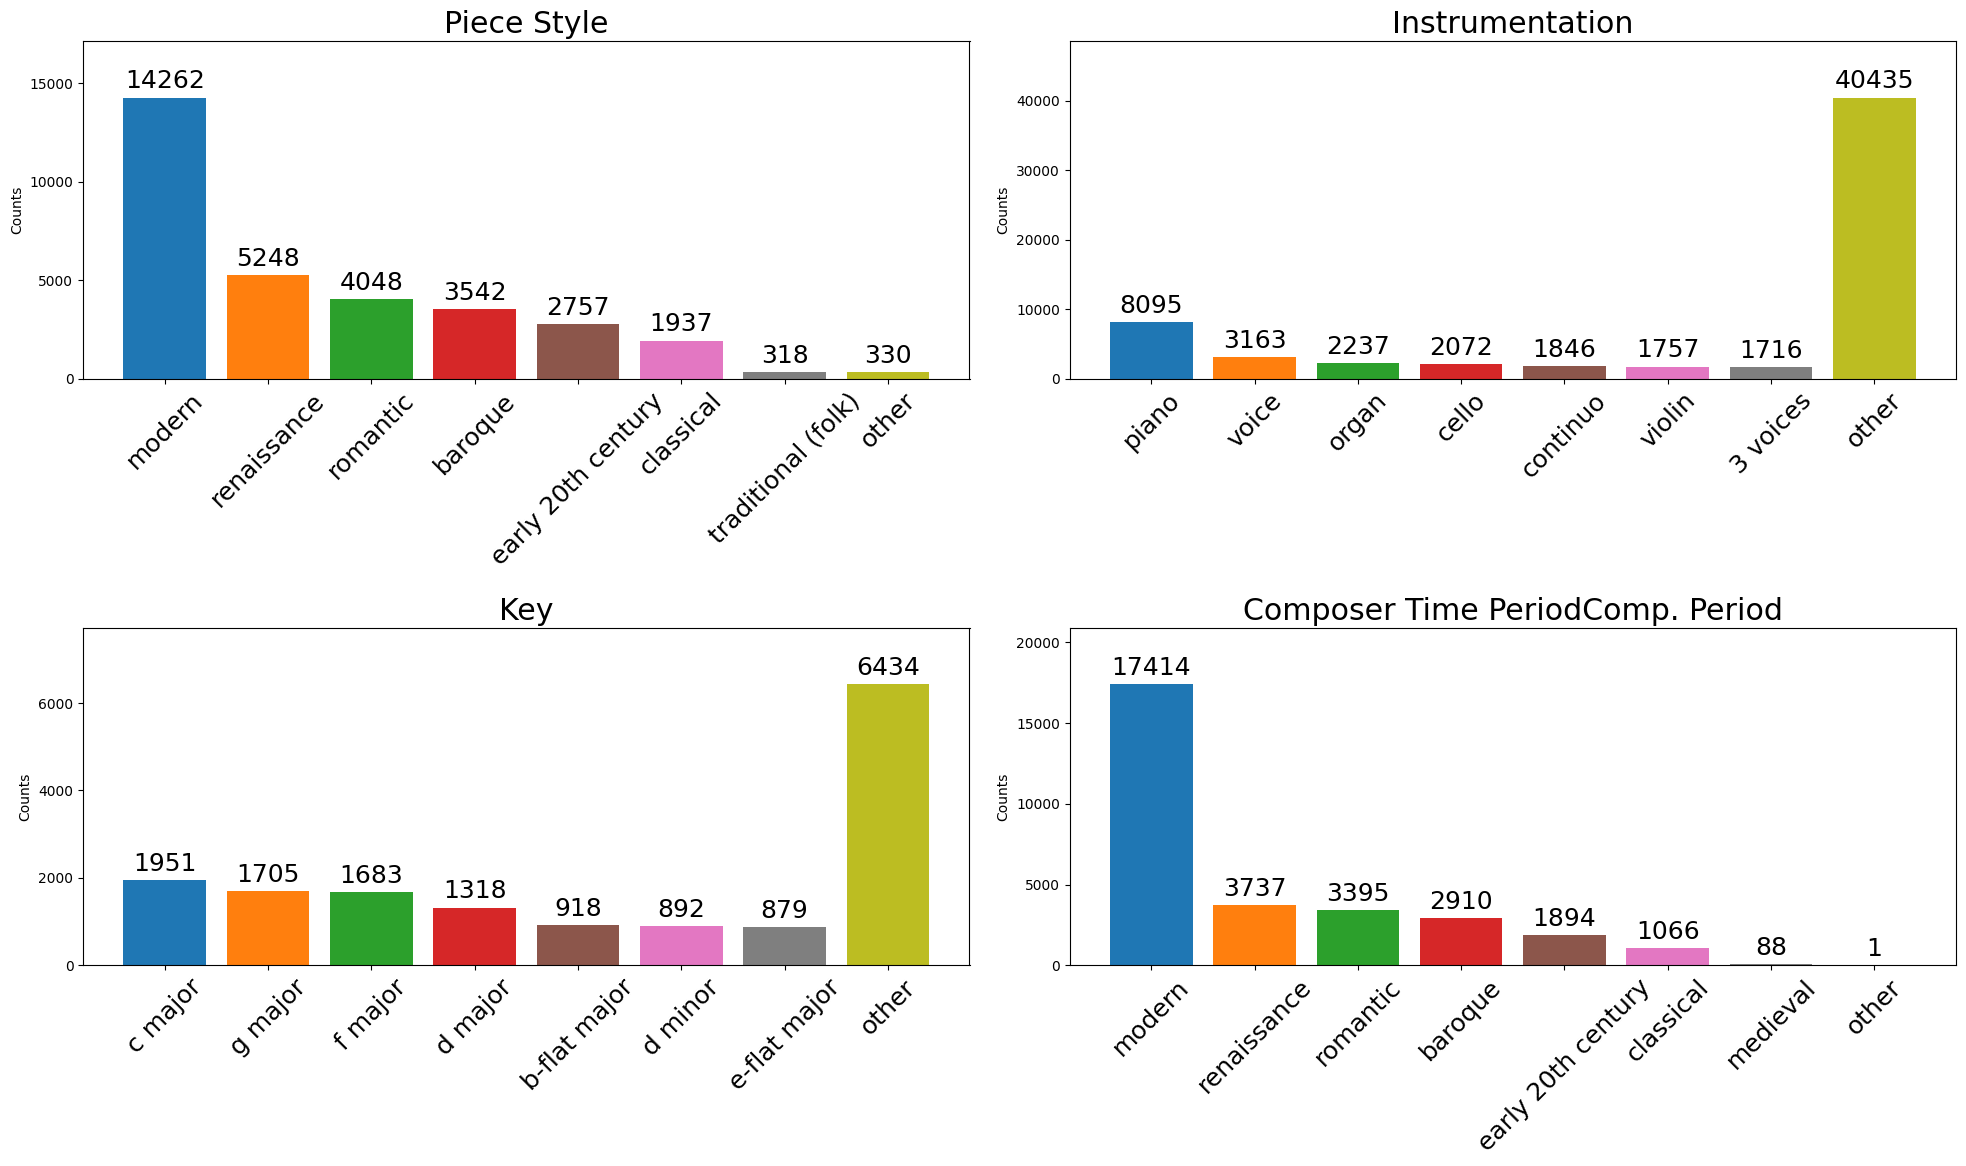

In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

# 加载JSON数据文件。
def load_json_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

# 提取并计数每个键的特定值，忽略大小写，且特殊处理乐器类别分割
def count_values(data, keys):
    raw_data = {key: Counter() for key in keys}
    for item in data:
        for key in keys:
            value = item.get(key)
            if value is not None:
                # 针对所有键，先统一转换成小写来忽略大小写的差异
                value = value.lower()
                if key == 'Instrumentation':
                    # 针对乐器，根据逗号分割，并去除可能的空格
                    instruments = [instrument.strip() for instrument in value.split(',')]
                    for instrument in instruments:
                        raw_data[key][instrument] += 1
                else:
                    raw_data[key][value] += 1
    
    counted_data = {}
    for key, counter in raw_data.items():
        most_common = counter.most_common(7)  # 获取数量最多的前9类
        other_count = sum(count for _, count in counter.items() if count not in dict(most_common).values())
        # 新建一个Counter，只包含前9类和"other"
        counted_data[key] = Counter({k: v for k, v in most_common})
        if other_count > 0:  # 如果有超过9类，则添加"other"类别
            counted_data[key]['other'] = other_count
            
    return counted_data

def visualize_data(counted_data):
    keys = counted_data.keys()
    n = len(keys)
    ncols = 2
    nrows = n // ncols + (n % ncols > 0)

    fig, axes = plt.subplots(nrows, ncols, figsize=(20, nrows * 6))  # 调整图的整体尺寸
    
    if n == 1:
        axes = np.array([[axes]])
    elif nrows == 1:
        axes = np.array([axes])
    elif ncols == 1:
        axes = np.array([axes]).T

    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    
    # 更新字体大小，但不加粗
    plt.rcParams.update({'font.size': 18})
    
    for i, (key, counter) in enumerate(counted_data.items()):
        ax = axes.flatten()[i] if nrows * ncols > 1 else axes
        categories = list(counter.keys())
        counts = list(counter.values())
        bars = ax.bar(categories, counts, color=plt.cm.tab10(np.arange(len(categories))/len(categories)))
        ax.set_title(key)  # 标题默认字体
        ax.set_ylabel('Counts')  # Y轴标签默认字体
        ax.tick_params(axis='x', rotation=45, labelsize='medium')  # x轴标签的大小调整为适中
        
        ax.set_ylim(0, max(counts) * 1.2)  # 设置y轴上限为最大数值的115%，以避免标签溢出
        
        for bar in bars:
            height = bar.get_height()
            # 在条形的上方注释数值，使用相对偏移来保证距离条形一定间隔
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 调整垂直偏移量
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    # 删除多余的子图
    while n < nrows * ncols:
        fig.delaxes(axes.flatten()[n])
        n += 1

    plt.tight_layout()
    plt.show()

# 分析并可视化数据
def analyze_and_visualize(filepath, keys):
    data = load_json_data(filepath)
    counted_data = count_values(data, keys)
    if counted_data:
        visualize_data(counted_data)
    else:
        print("No data found for given keys or the keys do not exist.")

# 使用脚本的示例
filepath = '/datasets/score_data/hd_data/hd_data.json'  # JSON文件的路径。
keys = [
    'Piece Style', 
    'Instrumentation',
    'Key',
    'Composer Time PeriodComp. Period'
]  # 你想分析的键列表。
analyze_and_visualize(filepath, keys)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

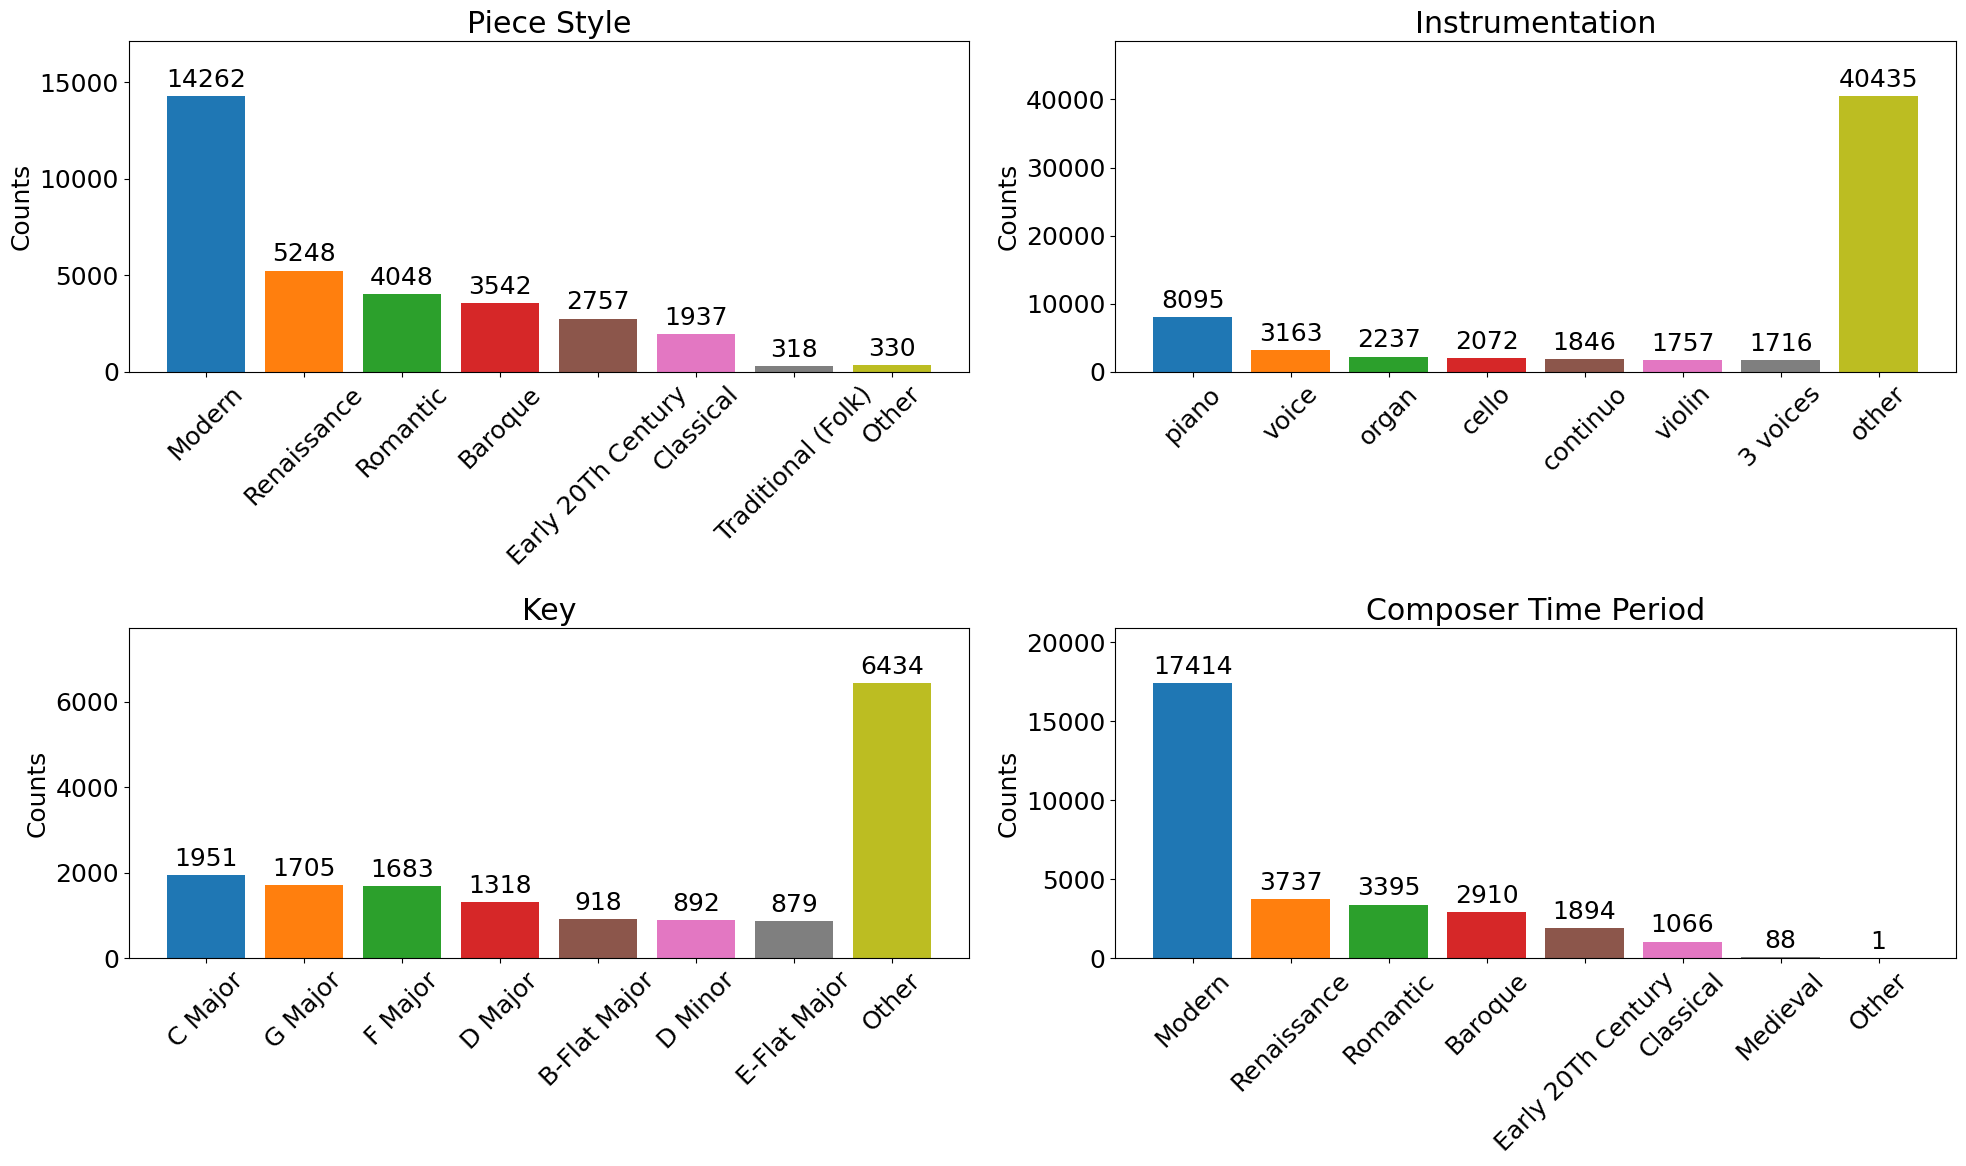

In [2]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# 加载JSON数据文件
def load_json_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

def count_values(data, keys):
    raw_data = {key: Counter() for key in keys}
    for item in data:
        for key in keys:
            value = item.get(key)
            if value is not None:
                value = value.lower()
                if key == 'Instrumentation':
                    instruments = [instrument.strip() for instrument in value.split(',')]
                    for instrument in instruments:
                        raw_data[key][instrument] += 1
                else:
                    raw_data[key][value] += 1
    
    counted_data = {}
    for key, counter in raw_data.items():
        most_common = counter.most_common(7)
        other_count = sum(count for _, count in counter.items() if count not in dict(most_common).values())
        counted_data[key] = Counter({k: v for k, v in most_common})
        if other_count > 0:
            counted_data[key]['other'] = other_count
            
    return counted_data

def visualize_data(counted_data):
    keys = counted_data.keys()
    n = len(keys)
    ncols = 2
    nrows = n // ncols + (n % ncols > 0)

    # 更新全局字体为Times New Roman
    plt.rcParams.update({'font.family':'Times New Roman', 'font.size': 18})
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, nrows * 6))
    if n == 1:
        axes = np.array([[axes]])
    elif nrows == 1:
        axes = np.array([axes])
    elif ncols == 1:
        axes = np.array([axes]).T
    
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    
    for i, (key, counter) in enumerate(counted_data.items()):
        ax = axes.flatten()[i] if nrows * ncols > 1 else axes
        categories = list(counter.keys())
        if key in ['Piece Style', 'Key', 'Composer Time PeriodComp. Period']:
            categories = [category.title() for category in categories]  # 大写处理
        counts = list(counter.values())
        bars = ax.bar(categories, counts, color=plt.cm.tab10(np.arange(len(categories))/len(categories)))
        ax.set_title('Composer Time Period' if key == 'Composer Time PeriodComp. Period' else key)
        ax.set_ylabel('Counts')
        ax.tick_params(axis='x', rotation=45)
        
        ax.set_ylim(0, max(counts) * 1.2)
        
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    while n < nrows * ncols:
        fig.delaxes(axes.flatten()[n])
        n += 1

    plt.tight_layout()
    plt.show()

def analyze_and_visualize(filepath, keys):
    data = load_json_data(filepath)
    counted_data = count_values(data, keys)
    if counted_data:
        visualize_data(counted_data)
    else:
        print("No data found for given keys or the keys do not exist.")
        
# 使用脚本的示例
filepath = '/datasets/score_data/hd_data/hd_data.json'  # JSON文件的路径。
keys = [
    'Piece Style', 
    'Instrumentation',
    'Key',
    'Composer Time PeriodComp. Period'
]
analyze_and_visualize(filepath, keys)

In [23]:
import json

# 读取原始JSON文件并转换格式
def convert_json_file(input_filepath, output_filepath):
    # 读取输入文件
    with open(input_filepath, 'r', encoding='utf-8') as input_file:
        input_data = json.load(input_file)
    
    output_data = []

    # 进行转换
    for key, value in input_data.items():
        # 添加id键
        value["id"] = key
        # 保证每个输出条目只含有所需的信息
        output_entry = {k: value[k] for k in value if k != "Opus/Catalogue NumberOp./Cat. No." and k != "Year/Date of CompositionY/D of Comp." and k != "First Publication." and k != "Average DurationAvg. Duration"}
        output_data.append(output_entry)
    
    # 写入输出文件
    with open(output_filepath, 'w', encoding='utf-8') as output_file:
        json.dump(output_data, output_file, indent=4, ensure_ascii=False)

# 假设您的输入文件路径为'input.json'和输出文件路径为'output.json'
input_filepath = '/datasets/score_data/musicscore-toy/musicscore/repo/musicscore-14K/hd_data_selected_inst.json'
output_filepath = '/datasets/score_data/musicscore-toy/musicscore/repo/musicscore-14K/hd_data_selected_inst_f.json'

convert_json_file(input_filepath, output_filepath)

In [1]:
import json

def convert_json_simple(input_filename, output_filename):
    with open(input_filename, 'r', encoding='utf-8') as infile:
        old_data = json.load(infile)
        
    new_data = []
    
    for key, value in old_data.items():
        # 将外部键添加到内部作为'id'字段
        value['id'] = key
        new_data.append(value)
    
    # 写入新的JSON文件
    with open(output_filename, 'w', encoding='utf-8') as outfile:
        json.dump(new_data, outfile, indent=4, ensure_ascii=False)

# 调用函数
# 请将'input.json'替换为您的原始JSON文件名, 'output.json'为转换后想要的文件名
convert_json_simple('/datasets/score_data/repo/MusicScore/musicscore-14K/hd_data_14k.json', '/datasets/score_data/repo/MusicScore/musicscore-14K/metadata.json')

In [3]:
import json

def remove_link_field(input_filename, output_filename):
    with open(input_filename, 'r', encoding='utf-8') as infile:
        data = json.load(infile)
        
    # 遍历数据，删除每个条目的'link'字段
    for entry in data:
        if 'link' in entry:
            del entry['link']
    
    # 将修改后的数据写入新的JSON文件
    with open(output_filename, 'w', encoding='utf-8') as outfile:
        json.dump(data, outfile, indent=4, ensure_ascii=False)

# 调用函数
# 请将'input.json'替换为您的原始JSON文件名, 'output.json'为转换后想要的文件名
remove_link_field('/datasets/score_data/repo/MusicScore/musicscore-200k/hd_data_old.json', '/datasets/score_data/repo/MusicScore/musicscore-200k/metadata.json')